In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("C://Users//Asus//Desktop//Year 4//DS4002//Assignments//Final project//Student_Depression_Data_Preprocessed.csv")

In [3]:
data.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
data['Depression'] = data['Depression'].astype('category')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 27901 non-null  object  
 1   Age                                    27901 non-null  float64 
 2   City                                   27901 non-null  object  
 3   Profession                             27901 non-null  object  
 4   Academic Pressure                      27901 non-null  float64 
 5   Work Pressure                          27901 non-null  float64 
 6   CGPA                                   27901 non-null  float64 
 7   Study Satisfaction                     27901 non-null  float64 
 8   Job Satisfaction                       27901 non-null  float64 
 9   Sleep Duration                         27901 non-null  object  
 10  Dietary Habits                         27901 non-null  obj

In [11]:
response = 'Depression'

In [13]:
num_cols = data.select_dtypes(include=["int64","float"]).columns
cat_cols = [col for col in data.select_dtypes(include=["object","category"]).columns if col!=response]

In [15]:
print("Categorical Variables and Their Categories:\n")
for col in cat_cols:
    print(f"{col}:")
    print(data[col].unique())
    print("\n")

# 3. Show range (min–max) and summary statistics for numerical variables
print("Numerical Variables Summary:\n")
print(data[num_cols].describe().T[['min', 'max']])

Categorical Variables and Their Categories:

Gender:
['Male' 'Female']


City:
['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']


Profession:
['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']


Sleep Duration:
["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']


Dietary Habits:
['Healthy' 'Moderate' 'Unhealthy' 'Others']


Degree:
['B.Pharm' '

In [17]:
x = data.drop("Depression", axis=1)
y = data['Depression']

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [21]:
import joblib
scaler = StandardScaler()
joblib.dump(scaler, 'scaler.pkl')
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [23]:
preprocessor = ColumnTransformer([
    ('num', scaler, num_cols),
    ('cat', encoder, cat_cols)
])

In [25]:
x_processed = preprocessor.fit_transform(x)

In [27]:
x_processed = pd.DataFrame(x_processed)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
y = y.dropna()
x_processed = x_processed.loc[y.index] 

In [33]:
x_train,x_test, y_train, y_test = train_test_split(x_processed,y,test_size=0.2, random_state=42, stratify=y)

### SVM

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [37]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

In [38]:
print("Accuracy Score =",accuracy_score(y_test,y_pred))

Accuracy Score = 0.8433972406378785


In [39]:
print("Classification Report:",classification_report(y_test,y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.82      0.79      0.81      2313
           1       0.86      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.84      0.84      0.84      5581



### Hyperparameter Tuning SVM

In [41]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid_svm = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

svm = SVC()
grid_svm = GridSearchCV(
    svm,
    param_grid_svm,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_svm.fit(x_train, y_train)

print("Best SVM Parameters:", grid_svm.best_params_)
print("Best CV Accuracy:", grid_svm.best_score_)

# Evaluate on test data
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(x_test)
print("Test Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best SVM Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Accuracy: 0.847983870967742
Test Accuracy (SVM): 0.8433972406378785


### Feature Selection for the tuned SVM

In [43]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

linear_svm = SVC(kernel='linear', C=grid_svm.best_params_['C'])
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rfecv_linear = RFECV(
    estimator=linear_svm,
    step=1,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

rfecv_linear.fit(x_train, y_train)
print("Optimal number of features:", rfecv_linear.n_features_)

Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitti

In [44]:
import matplotlib.pyplot as plt

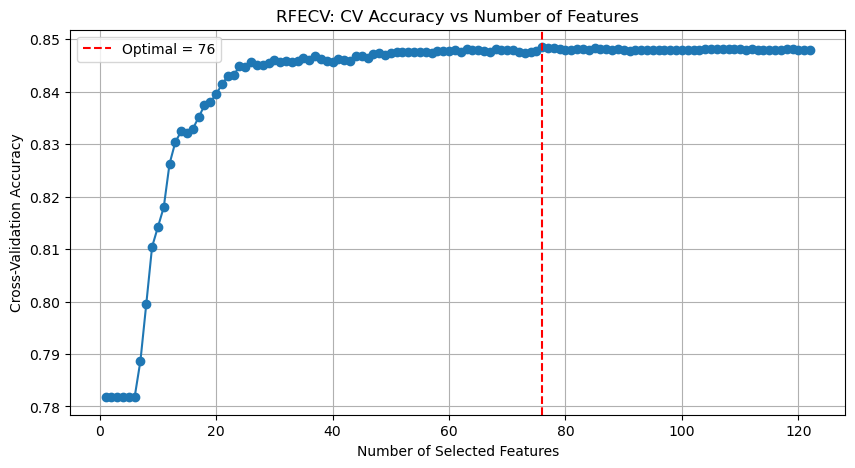

In [45]:
# Cross-validation accuracy vs number of features

cv_scores = rfecv_linear.cv_results_['mean_test_score'] if hasattr(rfecv_linear, 'cv_results_') else rfecv_linear.grid_scores_

plt.figure(figsize=(10,5))
plt.plot(range(1, len(cv_scores)+1), cv_scores, marker='o')
plt.axvline(rfecv_linear.n_features_, color='r', linestyle='--', label=f"Optimal = {rfecv_linear.n_features_}")
plt.xlabel("Number of Selected Features")
plt.ylabel("Cross-Validation Accuracy")
plt.title("RFECV: CV Accuracy vs Number of Features")
plt.legend()
plt.grid(True)
plt.show()

In [53]:
import numpy as np

In [55]:
encoded_cat_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
numeric_cols = num_cols
all_feature_names = np.concatenate([numeric_cols, encoded_cat_names])

In [61]:
from sklearn.metrics import confusion_matrix


Training Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      9252
           1       0.86      0.89      0.88     13068

    accuracy                           0.85     22320
   macro avg       0.85      0.84      0.85     22320
weighted avg       0.85      0.85      0.85     22320

Testing Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2313
           1       0.86      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.84      0.84      0.84      5581


Training Accuracy: 0.8510
Testing Accuracy: 0.8434

Confusion Matrix (Test Data):
[[1828  485]
 [ 389 2879]]


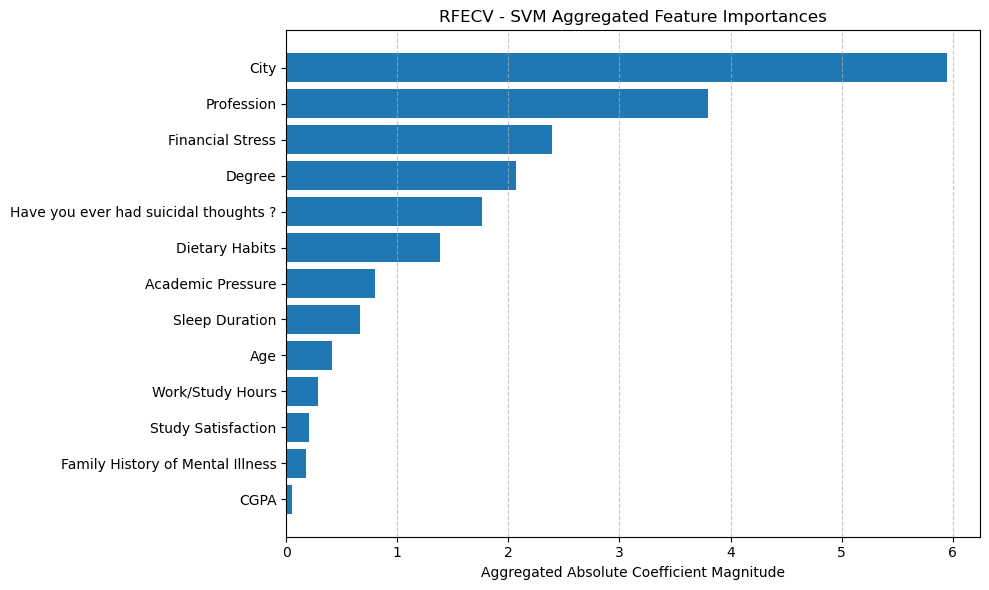


Top significant features (SVM):
City
Profession
Financial Stress
Degree
Have you ever had suicidal thoughts ?
Dietary Habits
Academic Pressure
Sleep Duration
Age
Work/Study Hours
Study Satisfaction
Family History of Mental Illness
CGPA


In [63]:
svm_selected_mask = rfecv_linear.support_
svm_selected_features = np.array(all_feature_names)[svm_selected_mask]

x_train_selected = x_train.values[:, svm_selected_mask]
x_test_selected = x_test.values[:, svm_selected_mask]

# ----------------------
# Retrain tuned SVM on selected features
# ----------------------
best_C = grid_svm.best_params_['C']
best_svm = SVC(kernel='linear', C=best_C)
best_svm.fit(x_train_selected, y_train)

# ----------------------
# Evaluate model
# ----------------------
y_train_pred = best_svm.predict(x_train_selected)
y_test_pred = best_svm.predict(x_test_selected)

print("\nTraining Classification Report (SVM):")
print(classification_report(y_train, y_train_pred))

print("Testing Classification Report (SVM):")
print(classification_report(y_test, y_test_pred))

print(f"\nTraining Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred))

# ----------------------
# Feature Importance Plot
# ----------------------
svm_coefficients = best_svm.coef_[0]
feature_importance_svm = {}

for name, coef in zip(svm_selected_features, svm_coefficients):
    base_name = name.split('_')[0] if "_" in name and name.split('_')[0] in cat_cols else name
    feature_importance_svm[base_name] = feature_importance_svm.get(base_name, 0) + abs(coef)

sorted_svm_features = sorted(feature_importance_svm.items(), key=lambda x: x[1], reverse=True)
svm_names = [x[0] for x in sorted_svm_features]
svm_values = [x[1] for x in sorted_svm_features]

plt.figure(figsize=(10, 6))
plt.barh(range(len(svm_names)), svm_values[::-1])
plt.yticks(range(len(svm_names)), svm_names[::-1])
plt.xlabel("Aggregated Absolute Coefficient Magnitude")
plt.title("RFECV - SVM Aggregated Feature Importances")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nTop significant features (SVM):")
for f in svm_names:
    print(f)

In [66]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize base model
svm_model = SVC()

# GridSearchCV on selected features
grid_search_selected = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search_selected.fit(x_train_selected, y_train)

print("Best Parameters:", grid_search_selected.best_params_)
print("Best Cross-validation Accuracy:", grid_search_selected.best_score_)

best_svm_tuned = grid_search_selected.best_estimator_
best_svm_tuned.fit(x_train_selected, y_train)

y_train_pred_tuned = best_svm_tuned.predict(x_train_selected)
y_test_pred_tuned = best_svm_tuned.predict(x_test_selected)

print("Tuned Training Classification Report:\n", classification_report(y_train, y_train_pred_tuned))
print("\nTuned Testing Classification Report:\n", classification_report(y_test, y_test_pred_tuned))



Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-validation Accuracy: 0.8488799283154123
Tuned Training Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82      9252
           1       0.86      0.89      0.88     13068

    accuracy                           0.85     22320
   macro avg       0.85      0.84      0.85     22320
weighted avg       0.85      0.85      0.85     22320


Tuned Testing Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      2313
           1       0.86      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.84      0.84      0.84      5581



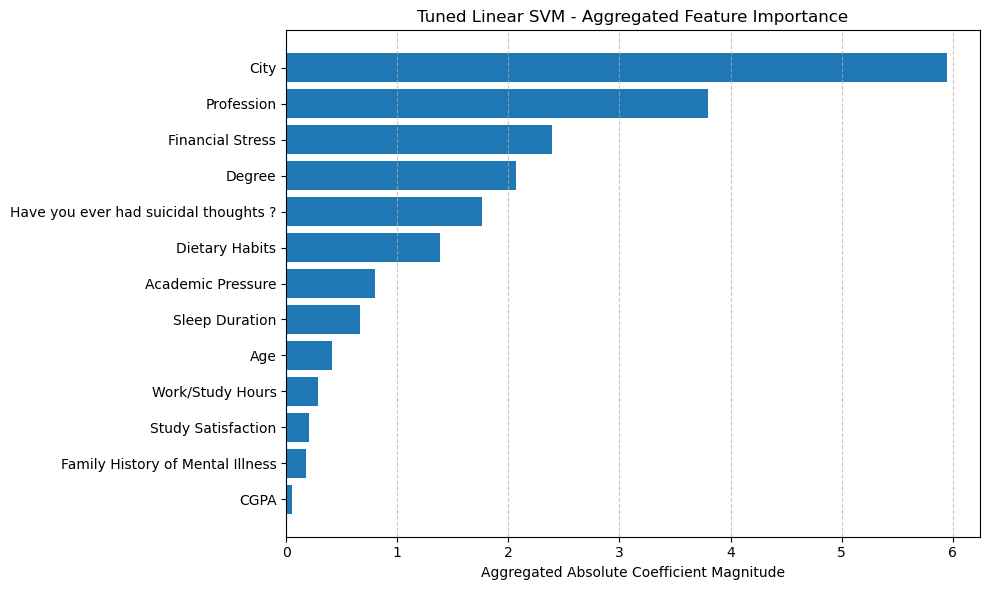

Aggregated feature importance plot saved as 'tuned_svm_feature_importance.png'
Tuned SVM model saved as 'tuned_svm_model.pkl'


In [67]:
import matplotlib.pyplot as plt
import joblib
import numpy as np

# Only works if the best kernel is linear
if best_svm_tuned.kernel == 'linear':
    # Get coefficients
    svm_coefficients = best_svm_tuned.coef_[0]
    feature_importance_svm = {}

    # Aggregate one-hot encoded categorical features
    for name, coef in zip(svm_selected_features, svm_coefficients):
        # Group dummy variables by their original categorical column
        base_name = name.split('_')[0] if "_" in name and name.split('_')[0] in cat_cols else name
        feature_importance_svm[base_name] = feature_importance_svm.get(base_name, 0) + abs(coef)

    # Sort features by aggregated absolute coefficient
    sorted_svm_features = sorted(feature_importance_svm.items(), key=lambda x: x[1], reverse=True)
    svm_names = [x[0] for x in sorted_svm_features]
    svm_values = [x[1] for x in sorted_svm_features]

    # Plot aggregated feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(svm_names)), svm_values[::-1])
    plt.yticks(range(len(svm_names)), svm_names[::-1])
    plt.xlabel("Aggregated Absolute Coefficient Magnitude")
    plt.title("Tuned Linear SVM - Aggregated Feature Importance")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("tuned_svm_feature_importance.png", dpi=300)
    plt.show()

    print("Aggregated feature importance plot saved as 'tuned_svm_feature_importance.png'")

    # Save the tuned SVM model
    joblib.dump(best_svm_tuned, "tuned_svm_model.pkl")
    print("Tuned SVM model saved as 'tuned_svm_model.pkl'")

else:
    print(f"Kernel '{best_svm_tuned.kernel}' does not provide coefficients for feature importance.")


Top 3 numerical features for PDP: ['Academic Pressure', 'Age', 'Work/Study Hours']


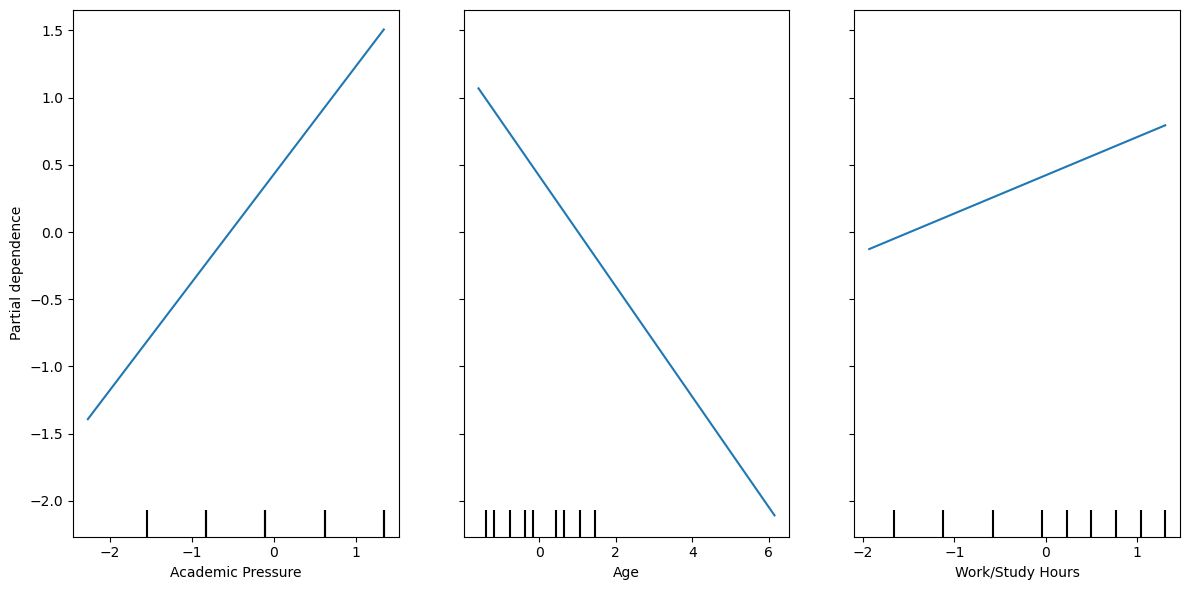

In [72]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Identify top 3 numerical features based on importance
top3_num_features = [f for f in svm_names if f in num_cols][:3]
print("Top 3 numerical features for PDP:", top3_num_features)

# Create PDPs for these top features
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(
    best_svm,
    X=x_test_selected,
    features=top3_num_features,
    feature_names=svm_selected_features,
    ax=ax
)
plt.tight_layout()
plt.savefig("pdp_top3_numerical_features.png", dpi=300)
plt.show()


C:\Users\Asus\anaconda3\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)
C:\Users\Asus\AppData\Local\Temp\ipykernel_39352\3473229177.py:21: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  shap_df_agg = shap_df.groupby(level=0, axis=1).sum()
C:\Users\Asus\AppData\Local\Temp\ipykernel_39352\3473229177.py:22: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  X_test_agg = X_test_df.groupby(level=0, axis=1).sum()


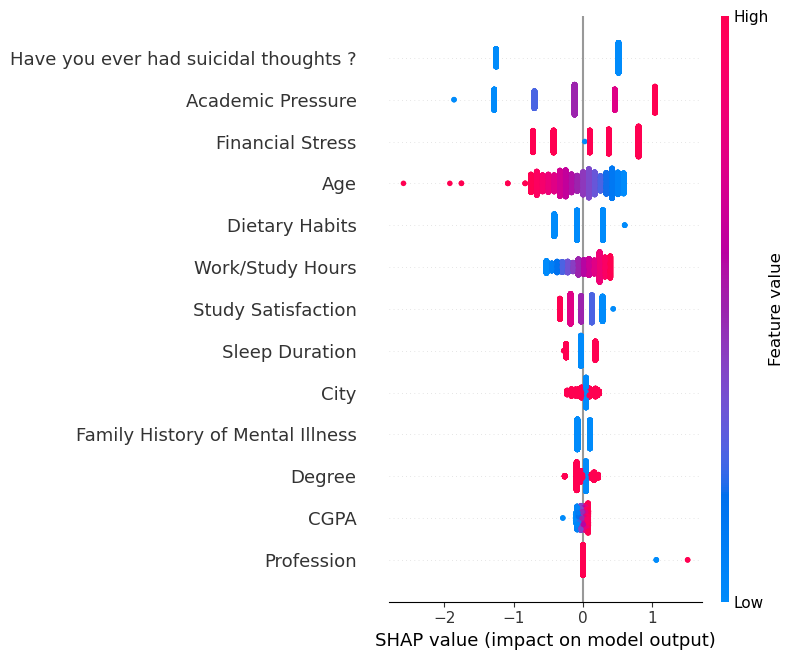

In [82]:
# Map each encoded/dummy variable back to its original column
feature_map = {
    name: (name.split('_')[0] if "_" in name and name.split('_')[0] in cat_cols else name)
    for name in svm_selected_features
}

# Create new list of readable feature names
svm_selected_readable = [feature_map[name] for name in svm_selected_features]

import shap

explainer = shap.LinearExplainer(best_svm, x_train_selected, feature_perturbation="interventional")
shap_values = explainer.shap_values(x_test_selected)

# Convert shap values to aggregated original features
import pandas as pd
shap_df = pd.DataFrame(shap_values, columns=svm_selected_readable)
X_test_df = pd.DataFrame(x_test_selected, columns=svm_selected_readable)

# Aggregate duplicates (dummy columns that map to the same original variable)
shap_df_agg = shap_df.groupby(level=0, axis=1).sum()
X_test_agg = X_test_df.groupby(level=0, axis=1).sum()

# SHAP summary for original variables
shap.summary_plot(shap_df_agg.values, X_test_agg, feature_names=shap_df_agg.columns)

# Save the plot as a PNG
plt.savefig("shap_summary.png", dpi=300, bbox_inches='tight')

# Optional: close the figure to free memory
plt.close()

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import shap

# Use your already defined selected features
# x_train, x_test are your preprocessed DataFrames
X_train_selected = x_train.values[:, svm_selected_mask]
X_test_selected = x_test.values[:, svm_selected_mask]

# -------------------
# Partial Dependence Plot (PDP)
# -------------------
top_features = svm_selected_features[:3]  # top 3 features

fig, ax = plt.subplots(figsize=(12,6))
PartialDependenceDisplay.from_estimator(
    best_svm_tuned,
    X=X_test_selected,
    features=top_features,
    feature_names=svm_selected_features,
    ax=ax
)
plt.tight_layout()
plt.savefig("pdp_top3_features.png", dpi=300)
plt.show()

# -------------------
# SHAP Plots
# -------------------
explainer = shap.LinearExplainer(best_svm_tuned, X_train_selected, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test_selected)

# Summary plot
shap.summary_plot(shap_values, X_test_selected, feature_names=svm_selected_features)

# Force plot for first sample
shap.force_plot(
    explainer.expected_value,
    shap_values[0],
    X_test_selected[0],
    feature_names=svm_selected_features,
    matplotlib=True
)


In [ ]:


# Create DataFrame of SHAP values
shap_df = pd.DataFrame(shap_values, columns=svm_selected_features)

# Group categorical dummy variables by original column
shap_grouped = pd.DataFrame()
for f in svm_selected_features:
    if '_' in f and f.split('_')[0] in cat_cols:
        base = f.split('_')[0]
        if base not in shap_grouped.columns:
            shap_grouped[base] = shap_df.filter(like=base+'_').abs().sum(axis=1)
        else:
            shap_grouped[base] += shap_df.filter(like=base+'_').abs().sum(axis=1)
    elif f in num_cols:
        shap_grouped[f] = shap_df[f]
plt.figure()
shap_values_agg = shap_grouped.values
shap.summary_plot(shap_values_agg, shap_grouped, feature_names=shap_grouped.columns, show=False)
plt.tight_layout()
plt.savefig("shap_summary_aggregated.png", dpi=300)
plt.show()
print("Aggregated SHAP summary plot saved as 'shap_summary_aggregated.png'")



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_test_pred = best_svm_tuned.predict(X_test_selected)

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
labels = best_svm_tuned.classes_

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM)")
plt.tight_layout()
plt.savefig("svm_confusion_matrix.png", dpi=300)
plt.show()

print("Confusion matrix heatmap saved as 'svm_confusion_matrix.png'")


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict decision scores (works for SVM)
y_score = best_svm_tuned.decision_function(X_test_selected)

fpr, tpr, _ = roc_curve(y_test.map({y_test.unique()[0]:0, y_test.unique()[1]:1}), y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Binary SVM)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig("svm_roc_curve_binary.png", dpi=300)
plt.show()

print("ROC curve saved as 'svm_roc_curve_binary.png'")


### Feature Selection for original SVM model

In [ ]:
from sklearn.feature_selection import RFECV
svm_base = SVC(kernel='linear', C=1.0)

rfecv_svm_base = RFECV(
    estimator=svm_base,
    step=1,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

rfecv_svm_base.fit(x_train, y_train)

print("Optimal number of features (original SVM):", rfecv_svm_base.n_features_)
selected_features_svm_base = x_train.columns[rfecv_svm_base.support_]
print("Selected features (original SVM):")
print(selected_features_svm_base.tolist())


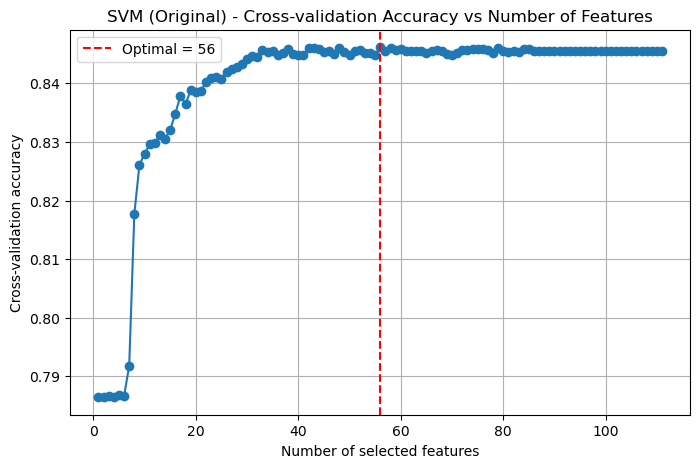

In [68]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))
plt.title("SVM (Original) - Cross-validation Accuracy vs Number of Features")
plt.xlabel("Number of selected features")
plt.ylabel("Cross-validation accuracy")

# Access scores safely
scores_base = (rfecv_svm_base.cv_results_['mean_test_score']
               if hasattr(rfecv_svm_base, 'cv_results_')
               else rfecv_svm_base.grid_scores_)

plt.plot(range(1, len(scores_base) + 1), scores_base, marker='o')
plt.axvline(rfecv_svm_base.n_features_, color='r', linestyle='--',
            label=f"Optimal = {rfecv_svm_base.n_features_}")
plt.legend()
plt.grid(True)
plt.show()

### Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

In [57]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

In [58]:
print("Accuracy Score =",accuracy_score(y_test,y_pred))

Accuracy Score = 0.4167055529631358


In [59]:
print("Classification Report:",classification_report(y_test,y_pred))

Classification Report:               precision    recall  f1-score   support

         0.0       0.42      1.00      0.59       890
         1.0       0.80      0.00      0.01      1253

    accuracy                           0.42      2143
   macro avg       0.61      0.50      0.30      2143
weighted avg       0.64      0.42      0.25      2143



### Hyperparameter Tuning Naive Bayes

In [85]:
from sklearn.naive_bayes import GaussianNB

param_grid_nb = {
    'var_smoothing': np.logspace(-9, -2, 10)
}

nb = GaussianNB()
grid_nb = GridSearchCV(
    nb,
    param_grid_nb,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_nb.fit(x_train, y_train)

print("Best Naive Bayes Parameters:", grid_nb.best_params_)
print("Best CV Accuracy:", grid_nb.best_score_)

# Evaluate on test data
best_nb = grid_nb.best_estimator_
y_pred_nb = best_nb.predict(x_test)
print("Test Accuracy (Naive Bayes):", accuracy_score(y_test, y_pred_nb))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Naive Bayes Parameters: {'var_smoothing': 4.641588833612782e-05}
Best CV Accuracy: 0.7516283264568224
Test Accuracy (Naive Bayes): 0.781614559029398


### Feature Selection for the tuned Naive Bayes

In [87]:
best_nb = grid_nb.best_estimator_

selector_nb_tuned = SelectKBest(score_func=f_classif, k='all')
selector_nb_tuned.fit(x_train, y_train)

feature_scores_nb_tuned = pd.DataFrame({
    'Feature': x_train.columns,
    'Score': selector_nb_tuned.scores_
}).sort_values(by='Score', ascending=False)

print("Top 10 important features (tuned Naive Bayes):")
print(feature_scores_nb_tuned.head(10))


Top 10 important features (tuned Naive Bayes):
     Feature        Score
99        99  3826.428772
98        98  3826.428772
1          1  2485.233716
105      105   613.355519
101      101   543.762868
0          0   472.400136
6          6   366.676886
67        67   309.872015
4          4   230.622800
102      102   222.971950


C:\Users\KavindiC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 10  11  18  50  55  63  68  97 100 107 110] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\KavindiC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


C:\Users\KavindiC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 10  11  18  50  55  63  68  97 100 107 110] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\KavindiC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\KavindiC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 10  11  18  50  55  63  68  97 100 107 110] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\KavindiC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\KavindiC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 10

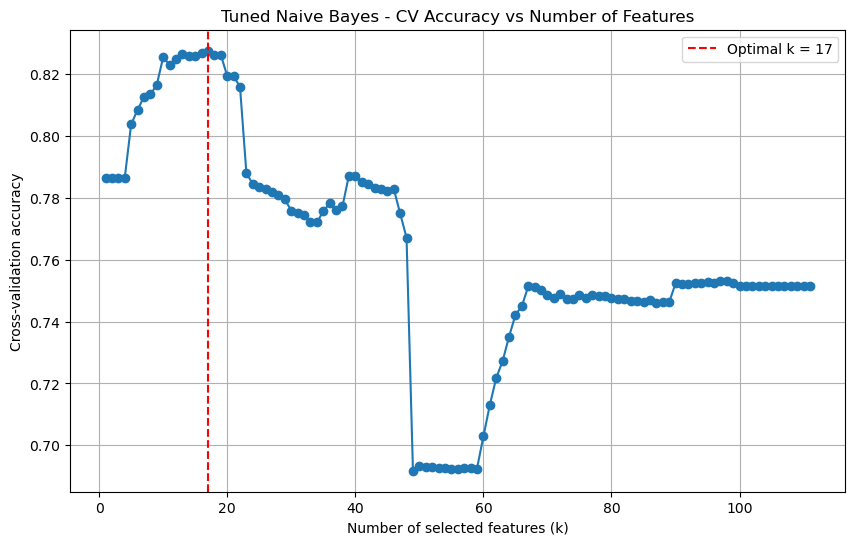

Best number of features for tuned Naive Bayes: 17


In [91]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_nb_tuned = []
k_values = range(1, x_train.shape[1] + 1)  # From 1 feature up to all features

for k in k_values:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_new = selector.fit_transform(x_train, y_train)
    score = cross_val_score(best_nb, X_new, y_train, cv=cv, scoring='accuracy').mean()
    scores_nb_tuned.append(score)

# Plot CV accuracy vs number of features
plt.figure(figsize=(10,6))
plt.plot(k_values, scores_nb_tuned, marker='o')
plt.title("Tuned Naive Bayes - CV Accuracy vs Number of Features")
plt.xlabel("Number of selected features (k)")
plt.ylabel("Cross-validation accuracy")
plt.grid(True)

# Highlight optimal number of features
best_k = np.argmax(scores_nb_tuned) + 1
plt.axvline(best_k, color='r', linestyle='--', label=f"Optimal k = {best_k}")
plt.legend()
plt.show()

print(f"Best number of features for tuned Naive Bayes: {best_k}")



### Feature Selection for original Naive Bayes model

In [86]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

selector_nb_base = SelectKBest(score_func=f_classif, k='all')
selector_nb_base.fit(x_train, y_train)

feature_scores_nb_base = pd.DataFrame({
    'Feature': x_train.columns,
    'Score': selector_nb_base.scores_
}).sort_values(by='Score', ascending=False)

print("Top 10 important features (original Naive Bayes):")
print(feature_scores_nb_base.head(10))


Top 10 important features (original Naive Bayes):
     Feature        Score
99        99  3826.428772
98        98  3826.428772
1          1  2485.233716
105      105   613.355519
101      101   543.762868
0          0   472.400136
6          6   366.676886
67        67   309.872015
4          4   230.622800
102      102   222.971950


C:\Users\KavindiC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 10  11  18  50  55  63  68  97 100 107 110] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\KavindiC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


C:\Users\KavindiC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 10  11  18  50  55  63  68  97 100 107 110] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\KavindiC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\KavindiC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 10  11  18  50  55  63  68  97 100 107 110] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\KavindiC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\KavindiC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 10

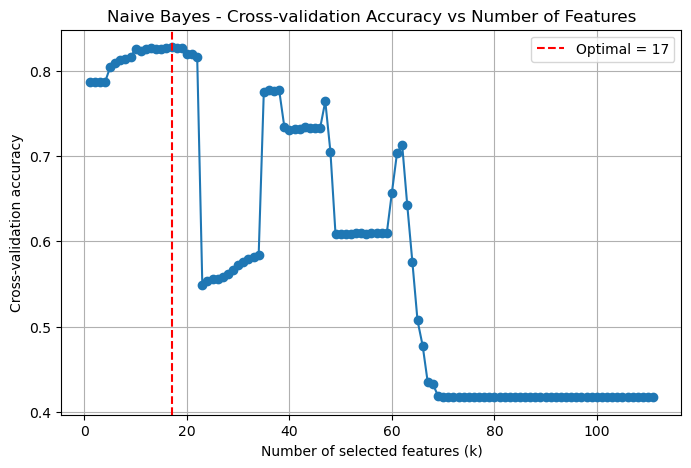

Best number of features for Naive Bayes: 17


In [88]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores_nb = []
k_values = range(1, x_train.shape[1] + 1)

for k in k_values:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_new = selector.fit_transform(x_train, y_train)
    score = cross_val_score(GaussianNB(), X_new, y_train, cv=cv, scoring='accuracy').mean()
    scores_nb.append(score)

plt.figure(figsize=(8,5))
plt.plot(k_values, scores_nb, marker='o')
plt.title("Naive Bayes - Cross-validation Accuracy vs Number of Features")
plt.xlabel("Number of selected features (k)")
plt.ylabel("Cross-validation accuracy")
plt.grid(True)

best_k = np.argmax(scores_nb) + 1
plt.axvline(best_k, color='r', linestyle='--', label=f"Optimal = {best_k}")
plt.legend()
plt.show()

print(f"Best number of features for Naive Bayes: {best_k}")
